# Introduction to Neural Networks

Cédric Campguilhem, April 2020

https://github.com/ccampguilhem

<a id="top"></a>
## Contents

- 0. [Setting up the Notebook](#setup)
- 1. [Perceptron algorithm](#perceptron)
- 2. [Which problems solved by Neuron Networks ?](#which)
- 3. [How to solve a non-linear problem ?](#non-linearity)

<a id="setup"></a>
## 0. Setting up the Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [73]:
BLUE = "#3498DB"
RED = "#E74C3C"
GREEN = "#2ECC71"

In [74]:
def plot_line_and_points(a=None, b=None, c=None, xi=None, yi=None, ci=None, alpha=1.0):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    if a is not None and b is not None and c is not None:
        x = np.linspace(-1., 1., 5)
        if np.abs(b) <= 1.e-8:
            b = 1.e-8
        y = - (a * x + c) / b
        ax.plot(x, y, color='k')
        X, Y = np.meshgrid(np.linspace(-1., 1., 11), np.linspace(-1., 1., 11))
        x = X.flatten()
        y = Y.flatten()
        z = a * x + b * y + c
        Z = z.reshape(X.shape)
        below = BLUE
        above = RED
        ax.contourf(X, Y, Z, levels=[-100., 0., 100.], colors=[below, above], alpha=alpha)
    if xi is not None:
        ax.scatter(xi, yi, c=ci, edgecolor='w', lw=1, s=50, zorder=10)
    ax.set_xlim((-1., 1.))
    ax.set_ylim((-1., 1.))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect('equal')
    return ax

In [75]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<a id="perceptron"></a>
## 1. Perceptron algorithm

Let's take a line equation in a 2D space. The equation of a line is:

$$
\large a \cdot x + b \cdot y + c = 0
$$

This line separates the 2D space in two regions:

<ul>
<li><p style="color: #3498DB">
A region below the line:
$$
\large a \cdot x + b \cdot y + c < 0
$$
</p></li>

<li><p style="color: #E74C3C">
A region above the line:
$$
\large a \cdot x + b \cdot y + c > 0
$$
</p></li>
</ul>

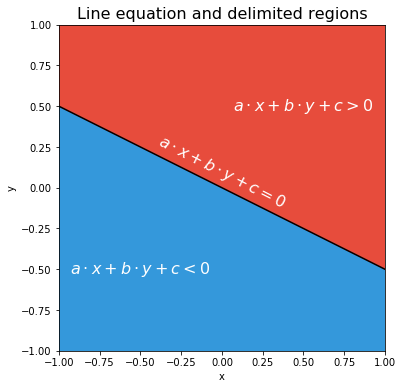

In [76]:
a = 0.5
b = 1.0
c = 0.
ax = plot_line_and_points(a=a, b=b, c=c)
ax.annotate(r"$a \cdot x + b \cdot y + c = 0$", (0., 0.1), rotation=-27.0, va='center', ha='center', 
            fontsize=16, color='white')
ax.annotate(r"$a \cdot x + b \cdot y + c > 0$", (0.5, 0.5), va='center', ha='center', 
            fontsize=16, color='white')
ax.annotate(r"$a \cdot x + b \cdot y + c < 0$", (-0.5, -0.5), va='center', ha='center', 
            fontsize=16, color='white');
ax.set_title("Line equation and delimited regions", fontsize=16);

Now let's consider un point P in space with [0.5, 0.4] coordinates:

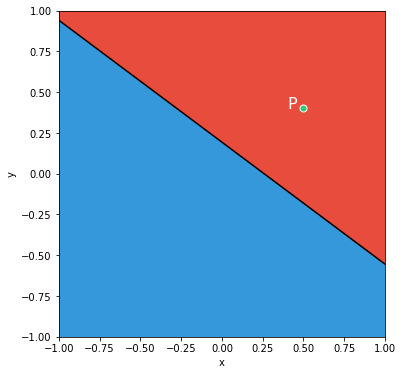

In [549]:
x = 0.5
y = 0.4
ax = plot_line_and_points(a, b, c, [x], [y], [GREEN])
ax.annotate("P", (0.5, 0.4), (0.4, 0.4), color='white', fontsize=16);

The distance between the point P and the line is given by:

$$
\large d = \frac{\lvert a \cdot x_P + b \cdot y_P + c \rvert}{\sqrt{a^2 + b^2}}
$$

The distance will tend to 0 if the numerator tends to 0. If you take a closer look at the numerator it appears its is the absolute value of the following dot product:

$$
\large
\begin{bmatrix}a \\ b \\ c\end{bmatrix} \cdot \begin{bmatrix}x_P \\ y_P \\ 1\end{bmatrix} = a \cdot x_P + b \cdot y_P + c
$$

So how can we make the absolute value of this dot product decrease ?

There are two configurations:

- if the dot product is positive, we need to decrease the dot product to decrease its absolute value
- if the dot product is negative, we need to increase the dot product to decrease its absoute value

The dot product is positive when P is in the <span style="color: #E74C3C">red region</span>:

$$
\large a \cdot x_P + b \cdot y_P + c > 0
$$

The dot product is negative when P is in the <span style="color: #3498DB">blue region</span>:

$$
\large a \cdot x_P + b \cdot y_P + c < 0
$$

To reduce the distance between the point and the line, we suggest the following algorithm. We assume that we are in the <span style="color: #E74C3C">red region</span>. We are going to remove a small quantity $\alpha > 0$ of the second vector from the first vector so that the dot product becomes:

$$
\large
\begin{bmatrix}a - \alpha x_P\\ b -\alpha y_P \\ c - \alpha\end{bmatrix} \cdot \begin{bmatrix}x_P \\ y_P \\ 1\end{bmatrix} = 
a \cdot x_P + b \cdot y_P + c - \alpha (x_P^2 + y_P^2 +1)
$$

So the quantity we are removing from the first vector is:

$$
\large \alpha (x_P^2 + y_P^2 +1)
$$

This quantity is striclty positive.

If P is in the <span style="color: #3498DB">blue region</span>, this quantity is added to the dot product instead.

So we can write a very simple algorithm to make the line closer to P:

- we initialise a line with a, b, and c parameters
- given a point P of coordinates [$x_P$, $y_p$]
- while $\lvert a \cdot x_P + b \cdot y_P + c \rvert > 0$:
    - if $a \cdot x_P + b \cdot y_P + c > 0$:
        - $a \leftarrow a - \alpha x_P$ 
        - $b \leftarrow b - \alpha y_P$
        - $c \leftarrow c - \alpha$
    - else:
        - $a \leftarrow a + \alpha x_P$ 
        - $b \leftarrow b + \alpha y_P$
        - $c \leftarrow c + \alpha$
        
This algorithm is the perceptron algorithm and has been invented in 1957 by Frank Rosenblatt.

Let's take an example. In our case the line equation is:

$$
0.5 \cdot x + 1.0 \cdot y + 0 = 0
$$

And the point coordinates are:

$$
\vec{OP} = \begin{bmatrix}0.5 & 0.4\end{bmatrix}
$$

Now let's assume that we remove from the line coefficient a portion of point coordinates:

$$
\begin{matrix}
0.5 & 1.0 & 0. \\
-0.3 \cdot 0.5 & -0.3 \cdot 0.4 & -0.3 \cdot 1. \\
0.35 & 0.88 & -0.3
\end{matrix}
$$

- A *portion* of x coordinate of P is substracted from the x coefficient (a) of the line equation.
- A *portion* of y coordinate of P is substracted from the y coefficient (b) of the line equation.
- A *portion* of 1 is substracted from the constant coefficient (c) of the line equation.
- *portion* is abitrarily set to 0.3 in this example.

The new line equation becomes:

$$
0.35 \cdot x + 0.88 \cdot y - 0.3 = 0
$$

And if we plot the line and point P, we see that the new line is closer to P:

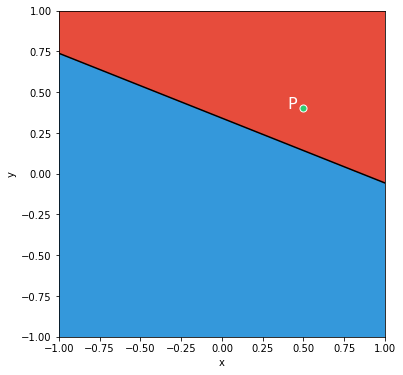

In [78]:
lr = 0.3
sign = -1.0 if a * x + b * y + c >= 0. else 1.0
a += lr * sign * x
b += lr * sign * y
c += lr * sign * 1.0
ax = plot_line_and_points(a, b, c, [x], [y], [GREEN])
ax.annotate("P", (0.5, 0.4), (0.4, 0.4), color='white', fontsize=16);

By doing the reverse operation:

$$
\begin{matrix}
0.35 & 0.88 & -0.3 \\
+0.3 \cdot 0.5 & +0.3 \cdot 0.4 & +0.3 \cdot 1. \\
0.5 & 1 & 0
\end{matrix}
$$

- A *portion* of x coordinate of P is added to the x coefficient (a) of the line equation.
- A *portion* of y coordinate of P is added the y coefficient (b) of the line equation.
- A *portion* of 1 is added the constant coefficient (c) of the line equation.
- *portion* is still set to 0.3 in this example.

The new line equation becomes:

$$
\large 0.5 \cdot x + 1 \cdot y - 0 = 0
$$

And if we plot the line and point P, we see that the new line is farther to point P and gets back to its original position:

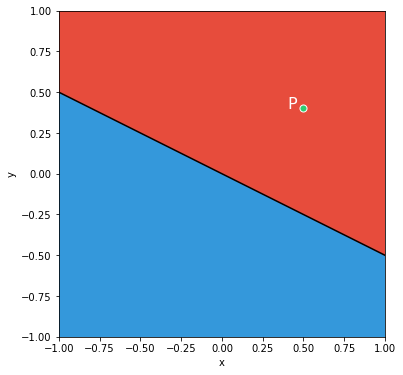

In [79]:
lr = 0.3
sign = -1.0 if a * x + b * y + c <= 0. else 1.0
a += lr * sign * x
b += lr * sign * y
c += lr * sign * 1.0
ax = plot_line_and_points(a, b, c, [x], [y], [GREEN])
ax.annotate("P", (0.5, 0.4), (0.4, 0.4), color='white', fontsize=16);

<a id="which"></a>
## 2. Which problems solved by Neuron Networks ?

Neuron Networks are used to solve different but we will focus on two specific applications:

- regression
- classification

A regression problem consists in find a relation between a response and one or more explanatory variables. 

A classification problem consist in identifying to which set of categories a new observation belongs.

### 2.1 Regression problem

Let's consider that we have collected experimental data. The response of the experiment y depends on an explanatory variable x. We assume that there is a linear relation between x and y.

Let's visualize the data points:

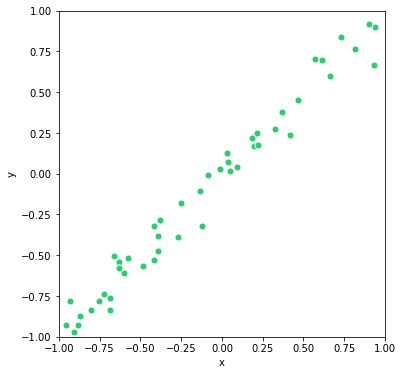

In [124]:
n = 50
np.random.seed(42)
x = np.random.uniform(-1., 1., n)
y = x + np.random.normal(0., 0.1, n)
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])

Let's take a random line and display the red and blue regions as we did before:

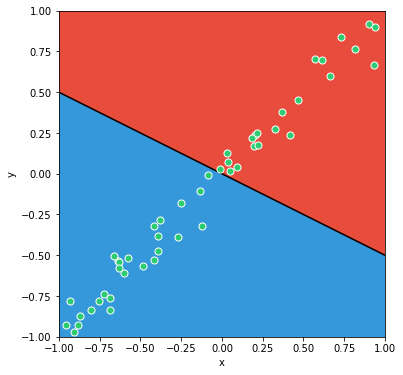

In [125]:
a = 0.5
b = 1.0
c = 0.
ax = plot_line_and_points(a, b, c, xi=x, yi=y, ci=[GREEN])

This line is a pretty bad model so far. What do we need to do to get a better one ? We need to move the line closer to the points. It turns out that it is what we have seen a bit earlier. So let's apply the perceptron algorithm to this use case.

The algorithm can be simply written this way:

In [126]:
alpha = 0.001
for i in range(100):
    for xi, yi in zip(x, y):    
        sign = -1.0 if a * xi + b * yi + c >= 0. else 1.0
        a += alpha * sign * xi
        b += alpha * sign * yi
        c += lr * sign * 1.0

We can now have a look at the line:

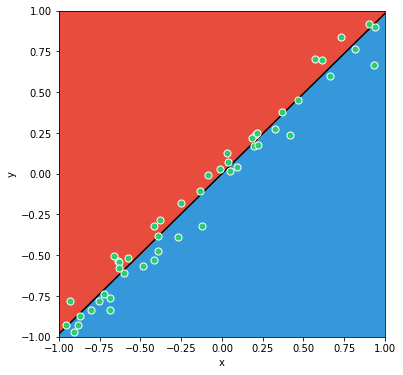

In [127]:
ax = plot_line_and_points(a, b, c, x, y, [GREEN])

This is much better, we now have a pretty good estimation of our problem.

How to use the model then ? We want to provide an abitrary x value such as the associated y value is predicted. The prediction is given by the line equation:

$$
a \cdot x + b \cdot y + c = 0
$$

If we isolate y:

$$
y = -\frac{a}{b} \cdot x - \frac{c}{b} \cdot 1
$$

A visual representation of this prediction might be:

<img src="./images/regression_model01.svg" style="height: 300px">

Here is an example of prediction with this model:

- an arbitrary $x_i$ value is taken
- we look for the intersection between the line $x = x_i$ with the line model
- we obtain the predicted $y$ value

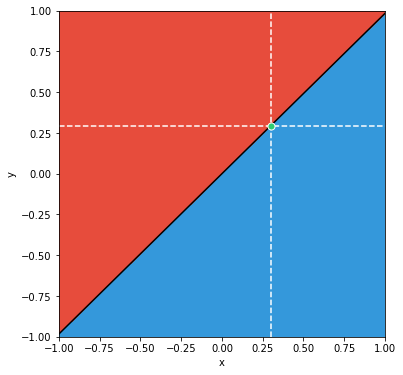

In [128]:
xp = 0.3
yp = -a/b * 0.3 - c/b
ax = plot_line_and_points(a, b, c, xp, yp, [GREEN])
ax.axvline(xp, color='w', ls="--")
ax.axhline(yp, color='w', ls="--");

### 2.2 Classification problem

Let's take another example for the classification. Let's say we have collected experimental data for two different kind of objects. The objects can be either red or blue and we have recorded 2 variables x and y for each object (in addition to their color):

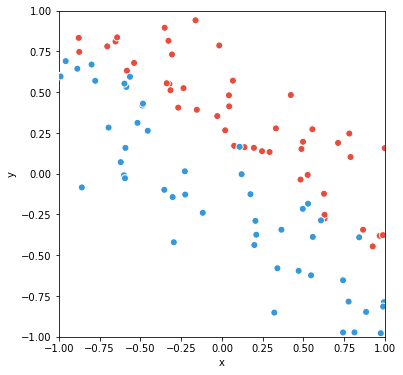

In [610]:
n = 50
x1 = np.random.uniform(-1., 1., n)
y1 = - 0.7 * x1 + 0.2 + np.random.triangular(-0.1, 0., 1.0, n)
colors = [RED]*n
x2 = np.random.uniform(-1., 1., n)
y2 = - 0.7 * x2 + 0.2 - np.random.triangular(-0.1, 0., 1.0, n)
colors.extend([BLUE]*n)
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))
ax = plot_line_and_points(xi=x, yi=y, ci=colors)

What we want to do is **separate** the blue and the red objects. We can infer from the data that a line could do a good separation of both. Let's start with a random line:

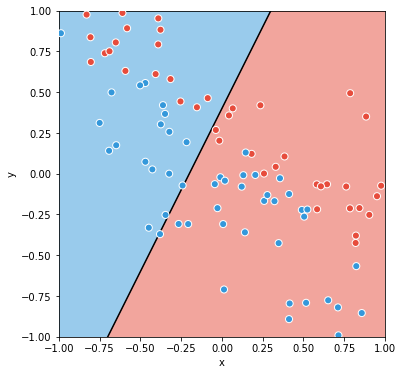

In [541]:
a = 1.0
b = -0.5
c = 0.2
ax = plot_line_and_points(a, b, c, xi=x, yi=y, ci=colors, alpha=0.5)

This model is pretty bad. We want the red dots to be in the red region and the blue dots in the blue region. How can we do that ?

Well, if a point is not in the right region, it well tell the line to move closer to it. If the point is in the right region, it will tell the line to stay where it is. So it is only a slight variation of the algorithm that we have used for the regression:

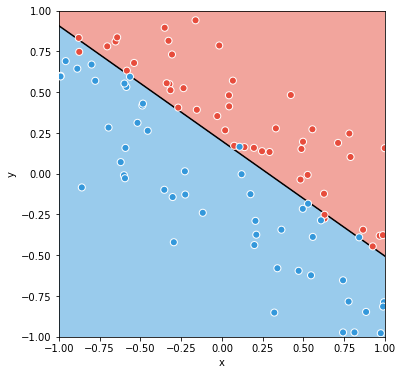

In [611]:
alpha = 0.001
for i in range(100):
    for xi, yi, color in zip(x, y, colors):
        sign = 0.0
        if color == RED:
            if a * xi + b * yi + c >= 0.:
                sign = 0.0 # Line is left unchanged
            else:
                sign = +1.0 # Line moves closer to red point
        else:
            if a * xi + b * yi + c <= 0.:
                sign = 0.0 # Line is left unchanged
            else:
                sign = -1.0 # Line moves closer to blue point            
        a += alpha * sign * xi
        b += alpha * sign * yi
        c += alpha * sign * 1.0
ax = plot_line_and_points(a, b, c, xi=x, yi=y, ci=colors, alpha=0.5)

Much better now. We do have some red dots which are misclassified but overall is pretty good.

How to use the model then ? We want to provide an abitrary $(x, y)$ point and to have the model predicts its color. As we have seen, the color depends on the sign of this equation:

$$
a \cdot x + b \cdot y + c >= 0  \Rightarrow \text{point is red}
$$ 

$$
a \cdot x + b \cdot y + c < 0  \Rightarrow \text{point is blue}
$$

Let's introduce $d$ variable:

$$
a \cdot x + b \cdot y + c = d
$$

A visual representation of what we have done:

<img src="./images/classification_model01.svg" style="height: 300px">

$d$ variable can be seen as a "signed" distance to the line. A high positive value means the point is in the red region. A positive but close to zero value means the point is in the red region but quite close from the line. The model does not only state the color of the point but also a confidence in the prediction.

The problem with that signed distance is that it's pretty difficult to interpert its abolute value. Is 5 far away from the line or actually very close ? One way to solve this issue would be to bring the values into a normalized range like [0, 1]. This can be done by applying a function to the signed distance that we have calculated. The fonction would have the following characteristics:

- $f(x \rightarrow -\infty) \rightarrow 0$
- $f(x \rightarrow \infty) \rightarrow 1$
- $f(x=0) = 0.5$

This could be achieved with a *sigmoid* function like the logistic function:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

This function looks like this:

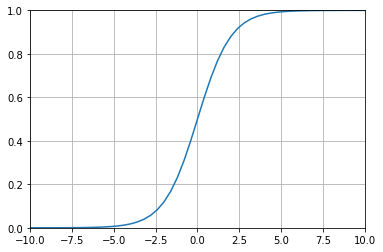

In [583]:
def logistic(x):
    return 1 / (1+ np.exp(-x))
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10., 10., 51)
ax.set_xlim((-10, 10))
ax.set_ylim((0, 1))
ax.plot(x, logistic(x))
ax.grid()

Let's update the visual representation:

<img src="./images/classification_model02.svg" style="height: 300px">

$p$ the new output of the calculation is a number between 0 and 1. It is close to 1 when point is red and close to 0 when point is blue. When p is 0.5 it can be either red or blue, we do not exactly know. p can be interpreted as a **probability**.

Here is an example of prediction with this model:

- an arbitrary $(x_i, y_i)$ point is taken
- we calculate the dot product of the point coordinates with the line equation
- we apply the sigmoid function
- the result gives the probability of the point being red

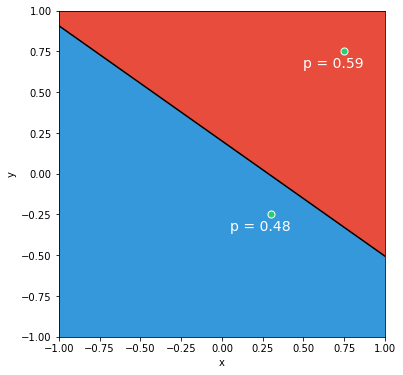

In [612]:
xp = [0.3, 0.75]
yp = [-0.25, 0.75]
ax = plot_line_and_points(a, b, c, xp, yp, [GREEN])
p = [0., 0.]
p[0] = logistic(a * xp[0] + b * yp[0] + c)
p[1] = logistic(a * xp[1] + b * yp[1] + c)
#ax.axvline(xp, color='w', ls="--", ymax=0.36)
#ax.axhline(yp, color='w', ls="--", xmax=0.64)
ax.annotate("p = {:.2f}".format(p[0]), (xp[0] - 0.25, yp[0] - 0.1), color='w', fontsize=14)
ax.annotate("p = {:.2f}".format(p[1]), (xp[1] - 0.25, yp[1] - 0.1), color='w', fontsize=14);

### 2.3 Similarities between the problems

Classification and regression seems to be quite different problem. But the problem can be solved in a very similar way using the algorithm we have just seen.

You might have noticed though that we haven't used a function like the sigmoïd function for the regression though. To make the visual representation closer, we are going to introduce a function for the regression model as well, but we will use the identity function $\sigma(x) = x$:

<img src="./images/regression_model02.svg" style="height: 300px">
<p style="text-align: center; font-size: 1.5em">A linear regression model</p>
    
<img src="./images/classification_model02.svg" style="height: 300px">
<p style="text-align: center; font-size: 1.5em">A linear classification model</p>

A line with the following equation:

$$
\large a \cdot x + b \cdot y + c = 0
$$

- models the relationship between x and y variables in a regression model
- separates two classes of data in the classification model

As output:

- the regression model predicts the y variable associated with x input
- the classification model predicts the probability of a data point (x, y) to be of a given class

Ok, but this tutorial is supposed to be on neuron network right ? So when am I going to start ?

Well I already have started. The models that we have introduced for the regression and the classification are neuron networks. These are very simple ones though. And we have trained the neuron network with a very simple algorithm: the perceptron algorithm.

Why do we call that neuron networks or artificial neuron networks ? Due to the similarity to a human neuron:

<img src="./images/Neuron.png">
<div style="text-align: center">
    Source: <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>
<div>
<br>

Human neuron collects inputs from the dentrites, processes the input signal in the cell body and then send the output signal through axon terminals. Obviously, human neurons are much more complex than their artificial counterparts.
    
This simple neuron network and algorithm works only for linearly separable classes or linear regression. The algorithm is also really unefficient in terms of calculation time and has some issues that you might have spotted (it always modifies the line equation and never converges to a given equation).

We will rapidly mention later what algorithm is used to train neuron network into advanced systems. But for now we are going to see what happen if the problem we have is not linear.

<a id="non-linearity"></a>
## 3. How to solve a non-linear problem ?

In a previous section, we have seen a very simple neuron network which works only for linear problem (linearly separable classes in a classification problem or linear regression).

We also have seen that the a model can be trained with the same kind of algorithm. In this section we will take an example of non-linear classification and regression and see what a neuron network can do.

    As the simple models have introduced is not capable of making non-linear regression, I am going to use Scikit-Learn which is a machine learning package providing algorithms to train neuron networks.

    Scikit-Learn is a very popular machine learning tool and is now under the responsibility of *Institut national de recherche en sciences et technologies du numérique* (INRIA).

### 3.1 Non-linear data for classification

We will use a very simple dataset for the example:

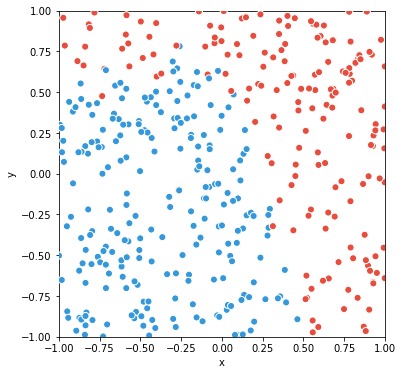

In [686]:
n = 400
x = np.random.uniform(-1., 1., n)
y = np.random.uniform(-1., 1., n)
noise = np.random.normal(0., 0.1, n)
colors = []
for i in range(n):
    d1 = 0.2 * x[i] - y[i] + 0.7 + noise[i]
    d2 = -3.0 * x[i] - y[i] + 0.7 + noise[i]
    if d1 <= 0 or d2 <= 0.:
        colors.append(RED)
    else:
        colors.append(BLUE)
ax = plot_line_and_points(xi=x, yi=y, ci=colors)

A single line cannot be used to model the data. A first idea would be to use a polynomial curve. But, for the sake of demonstration of neuron networks, I would like to stick with lines.

We cannot used a single line, but what about two lines ?

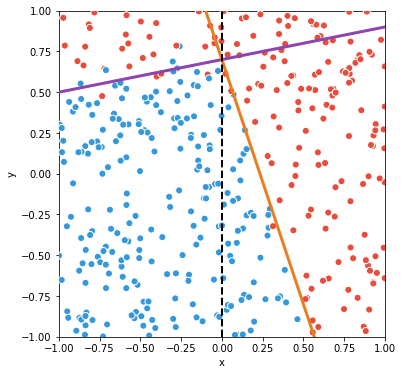

In [687]:
ax = plot_line_and_points(xi=x, yi=y, ci=colors)
x_test = np.linspace(-1., 1.0, 11)
y1 = 0.2 * x_test + 0.7
y2 = -3 * x_test + 0.7
ax.plot(x_test, y1, color='#8E44AD', zorder=20, lw=3.0)
ax.plot(x_test, y2, color='#E67E22', zorder=20, lw=3.0)
ax.axvline(0., color='k', ls="--", zorder=20, lw=2.0);
# ax.annotate("x = 0", (-0.55, -0.5), fontsize=14);
# ax.annotate("$y_1 = 0.2 \cdot x + 0.7$", (0.25, 0.65), fontsize=14, color='#8E44AD');
# ax.annotate("$y_2 = -1.2 \cdot x + 0.7$", (0.1, -0.5), fontsize=14, color='#E67E22');

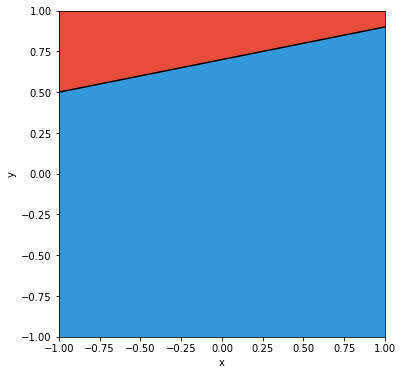

In [647]:
ax = plot_line_and_points(a=-0.2, b=+1, c=-0.7)

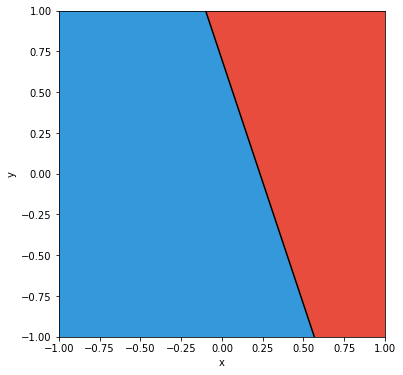

In [688]:
ax = plot_line_and_points(a=+3, b=+1, c=-0.7)

Not too bad, we are still making some mistakes but it's okay.

### 3.2 Let's try to fix the parameters of the neuron network manually

We have seen that two lines might be a good start to make a classification. 

The lines equation are:

$$
0.2 \cdot x + 0.7 = y_1 \\
-1.2 \cdot x + 0.7 = y_2
$$

With two line model, this is basically what we have so far:

<img src="./images/classification_model03.svg" style="height: 200px"/>
<img src="./images/classification_model04.svg" style="height: 200px"/>

What I want is to calculate $p$. So how can I get to $p$ from $p_1$ and $p_2$?

We can do that by summing of $p_1$ and $p_2$. But the sum would not be in the [0, 1] range anymore. So we could apply again a sigmoïd function.

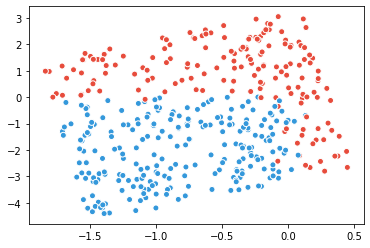

In [707]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = (-0.2 * x + y - 0.7)
p2 = (3 * x + y - 0.7)
ax.scatter(p1, p2, c=colors, edgecolor='w')
#ax.set_xlim((0, 1))
#ax.set_ylim((0, 1))
#ax.set_aspect('equal')
# #ax.scatter(x, y1, color='#8E44AD')
# #ax.scatter(x, y2, color='#E67E22')
#ax = plot_line_and_points(xi=x, yi=2*x+1.8-0.5*x+0.3, ci=[GREEN])

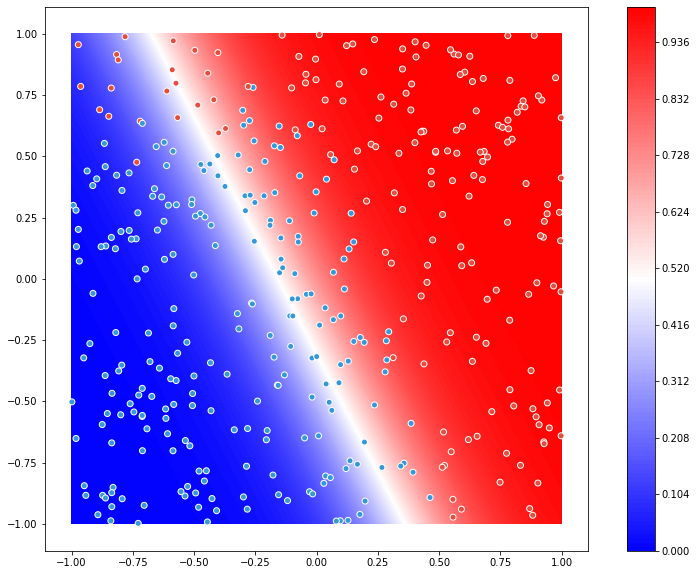

In [715]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
xgrid, ygrid = np.meshgrid(np.linspace(-1., 1., 51), np.linspace(-1., 1., 51))
p1 = -0.2 * xgrid + ygrid - 0.7
p2 = +3 * xgrid + ygrid - 0.7
p = logistic(1 * p1 + 2 * p2 + 3)
cont = ax.contourf(xgrid, ygrid, p, cmap='bwr', levels=128)
fig.colorbar(cont)
# ax.scatter(p2, p1, c=colors, edgecolor='w')
# ax.set_xlim((0, 1))
# ax.set_ylim((0, 1))
# ax.set_aspect('equal')
# # #ax.scatter(x, y1, color='#8E44AD')
# # #ax.scatter(x, y2, color='#E67E22')
# #ax = plot_line_and_points(xi=x, yi=2*x+1.8-0.5*x+0.3, ci=[GREEN])
ax.scatter(x, y, edgecolor='w', c=colors)
ax.set_aspect('equal')

In [627]:
x

array([-0.72113417, -0.48945928, -0.9280524 , -0.04036491,  0.52935679,
       -0.53323312,  0.57905766, -0.10022568,  0.50167902, -0.60022613,
       -0.8666428 ,  0.38044646, -0.41736632,  0.95560042,  0.41144805,
       -0.34003809, -0.35347774, -0.62184521,  0.69270468,  0.77378012,
       -0.30041076,  0.163064  ,  0.83198348,  0.45078299,  0.67393788,
       -0.51875187, -0.77459795, -0.78973301,  0.31604248, -0.78443377,
        0.89880689,  0.1657487 , -0.26777855, -0.01441072, -0.3207784 ,
        0.28032302, -0.13662763,  0.11775828, -0.28413563, -0.13707169,
       -0.0140506 ,  0.84507136,  0.00650245,  0.40643869, -0.88049442,
       -0.5475329 , -0.93635123,  0.97753591,  0.03787744,  0.86862654,
        0.06974893, -0.41280237,  0.98431663,  0.17303104,  0.8148487 ,
       -0.7634649 ,  0.61189123,  0.60017435,  0.73213748, -0.81729572,
       -0.50936006, -0.71712387, -0.4917472 , -0.04581293, -0.49046264,
        0.00750866,  0.31484702, -0.29021204,  0.32357588, -0.58

### 3.1 Non-linear data for regression

We will use a very simple dataset for the example:

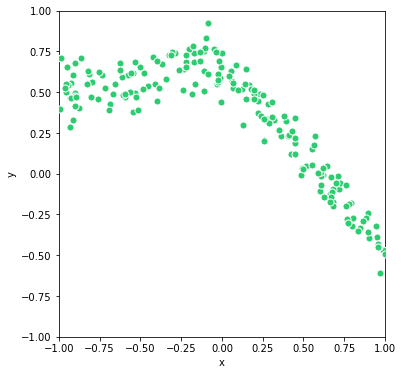

In [480]:
def calc_y(x, noise=True):
    mask = (x<= 0.0)
    y = np.zeros(x.shape)
    if noise:
        noise = np.random.normal(0., 0.1, x.shape[0])
    else:
        noise = np.zeros(x.shape)
    y[mask] = 0.2 * x[mask] + 0.7 + noise[mask]
    y[~mask] = -1.2 * x[~mask] + 0.7 + noise[~mask]    
    return y
# def calc_y(x, noise=True):
#     if noise:
#         noise = np.random.normal(0., 0.1, x.shape[0])
#     else:
#         noise = np.zeros(x.shape)
#     y = x + noise
#     return y
n = 200
x = np.random.uniform(-1., 1., n)
y = calc_y(x)
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])

A single line cannot be used to model the data. A first idea would be to use a polynomial regression like the one we can do in tools like Excel. But, for the sake of demonstration of neuron networks, I would like to stick with lines.

We cannot used a single line, but what about two lines ?

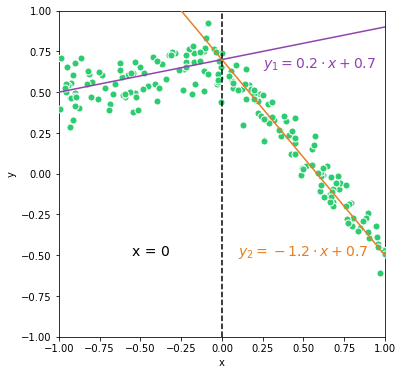

In [489]:
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])
x_test = np.linspace(-1., 1.0, 11)
y1 = 0.2 * x_test + 0.7
y2 = -1.2 * x_test + 0.7
ax.plot(x_test, y1, color='#8E44AD', zorder=20)
ax.plot(x_test, y2, color='#E67E22', zorder=20)
ax.axvline(0., color='k', ls="--", zorder=20)
ax.annotate("x = 0", (-0.55, -0.5), fontsize=14);
ax.annotate("$y_1 = 0.2 \cdot x + 0.7$", (0.25, 0.65), fontsize=14, color='#8E44AD');
ax.annotate("$y_2 = -1.2 \cdot x + 0.7$", (0.1, -0.5), fontsize=14, color='#E67E22');

### 3.3 Using Scikit-Learn to train a neuron network

In this section, we will train a neuron network with Scikit-Learn. But we are actually going to dive into the neuron network parameters to understand what the neuron network does. I am going to use a neuron network with 2 neurons: each neuron will create its own line model. Let's see what the neuron network comes up with.

Do not pay to much attention on the next few lines, I'll explain later.

In [532]:
x.shape, y.shape
x_train = np.vstack((x, y)).reshape(400, -1)
y_train = [1. if c == RED else 0. for c in colors]

In [536]:
from sklearn.neural_network import MLPClassifier
reg = MLPClassifier(hidden_layer_sizes=(2,), activation="relu", solver='lbfgs', 
                   learning_rate_init=0.01, random_state=42)
reg = reg.fit(x_train, y_train)

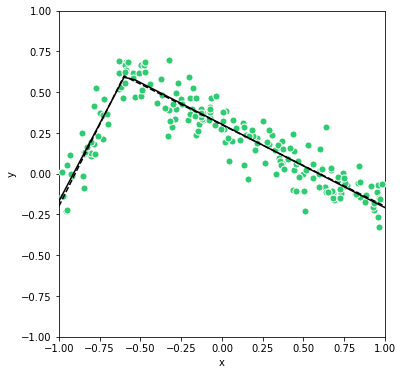

In [447]:
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])
x_test = np.linspace(-1., 1.0, 31)
y_pred = reg.predict(x4.reshape(-1, 1))
y_true = calc_y(x_test, noise=False)
ax.plot(x_test, y_pred, color='k', zorder=20)
ax.plot(x_test, y_true, color='k', zorder=20, ls='--');

In [537]:
reg.score(x_test.reshape(-1, 1), y_true)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [538]:
W, b = reg.coefs_[0], reg.intercepts_[0]
W, b

(array([[-0.3073117 ,  0.94833596],
        [ 0.56826494,  0.1289726 ]]),
 array([-0.84257881, -1.03448436]))

ValueError: operands could not be broadcast together with shapes (2,) (11,) 

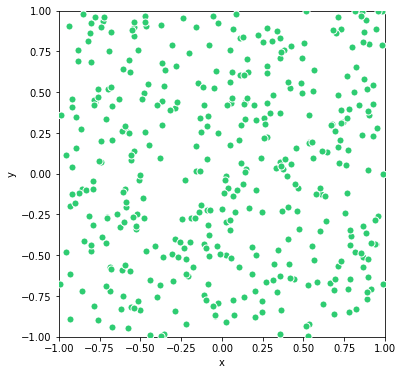

In [539]:
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])
ax.plot(x_test, W[0] * x_test + b[0]);
ax.plot(x_test, W[1] * x_test + b[1]);

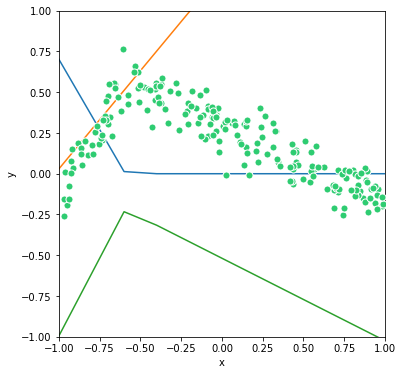

In [473]:
def relu(x):
    y = np.zeros(x.shape)
    y[x>=0] = x[x>=0]
    return y
ax = plot_line_and_points(xi=x, yi=y, ci=[GREEN])
y1_pred = W[0] * x_test + b[0]
y2_pred = W[1] * x_test + b[1]
ax.plot(x_test, relu(y1_pred));
ax.plot(x_test, relu(y2_pred));
ax.plot(x_test, -0.42*relu(y2_pred)-1.40*relu(y1_pred));

In [472]:
reg.coefs_

[array([[-1.7225733 ,  1.20473249]]),
 array([[-1.40227932],
        [-0.42432987]])]

### 2.3 Isn't this tutorial on Neuron Networks ?

Yes it is, and actually you have learned a lot about them already. What we have done above is training a neuron network. A very simple one actually, but it is fundamental for the following.

What we are going to do now is to change the writting of what we have done so far. To evaluate a point location, we have multiplied its coordinates with the coordinates of a line. This is a dot product calculation:

$$
\large
\begin{bmatrix}a \\ b \\ c\end{bmatrix} \cdot \begin{bmatrix}x_P \\ y_P \\ 1\end{bmatrix} = a \cdot x_P + b \cdot y_P + c
$$

Let's represent the calculation in the following form:



In [545]:
x = np.array([0.5, 0.5, 1])
x

array([0.5, 0.5, 1. ])

In [546]:
w = np.array([1, -1, 0.5])
w

array([ 1. , -1. ,  0.5])

In [547]:
x.dot(w)

0.5

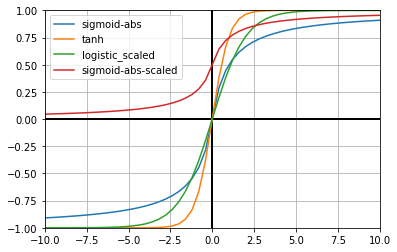

In [576]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10., 10., 51)
y = np.zeros(x.shape)
y[x>=0] = x[x>=0]
logistic = 1. / (1. + np.exp(-x))
logistic_scaled = 2 * logistic - 1.0
ax.set_xlim((-10, 10))
ax.set_ylim((-1, 1))
ax.axhline(0., lw=2.0, c='k')
ax.axvline(0., lw=2.0, c='k')
#ax.plot(x, y, label="relu")
#ax.plot(-x, y, label="relu -x")
#ax.plot(-x, -y, label="relu -y, -x")
ax.plot(x, x / (1 + np.abs(x)), label="sigmoid-abs")
#ax.plot(x, 1 / (1 + np.exp(-x)), label="logistic")
ax.plot(x, np.tanh(x), label="tanh")
ax.plot(x, logistic_scaled, label="logistic_scaled")
ax.plot(x, (x + np.abs(x) + 1) / (2 * (1 + np.abs(x))), label="sigmoid-abs-scaled")
ax.grid()
ax.legend()